Epoch 1/100
15/15 [==============================] - 1s 18ms/step - loss: 1.3103 - accuracy: 0.2750 - val_loss: 1.2522 - val_accuracy: 0.2667
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 1.2221 - accuracy: 0.3167 - val_loss: 1.1545 - val_accuracy: 0.2333
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 1.1377 - accuracy: 0.3750 - val_loss: 1.0747 - val_accuracy: 0.4333
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 1.0675 - accuracy: 0.3833 - val_loss: 1.0001 - val_accuracy: 0.5333
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 1.0036 - accuracy: 0.4750 - val_loss: 0.9334 - val_accuracy: 0.6333
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.9441 - accuracy: 0.5167 - val_loss: 0.8763 - val_accuracy: 0.6000
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.8966 - accuracy: 0.5583 - val_loss: 0.8205 - val_accuracy: 0.6333
Epoch 8/100


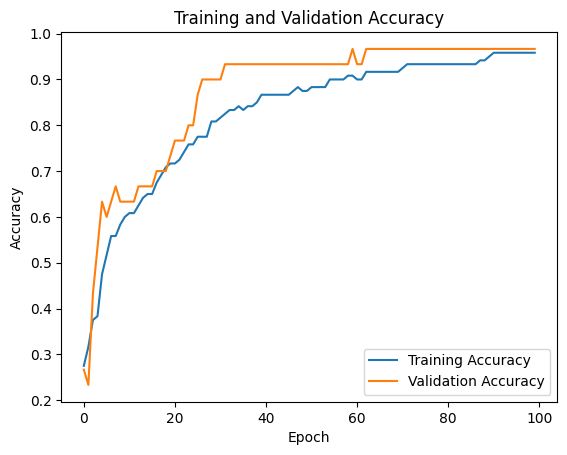

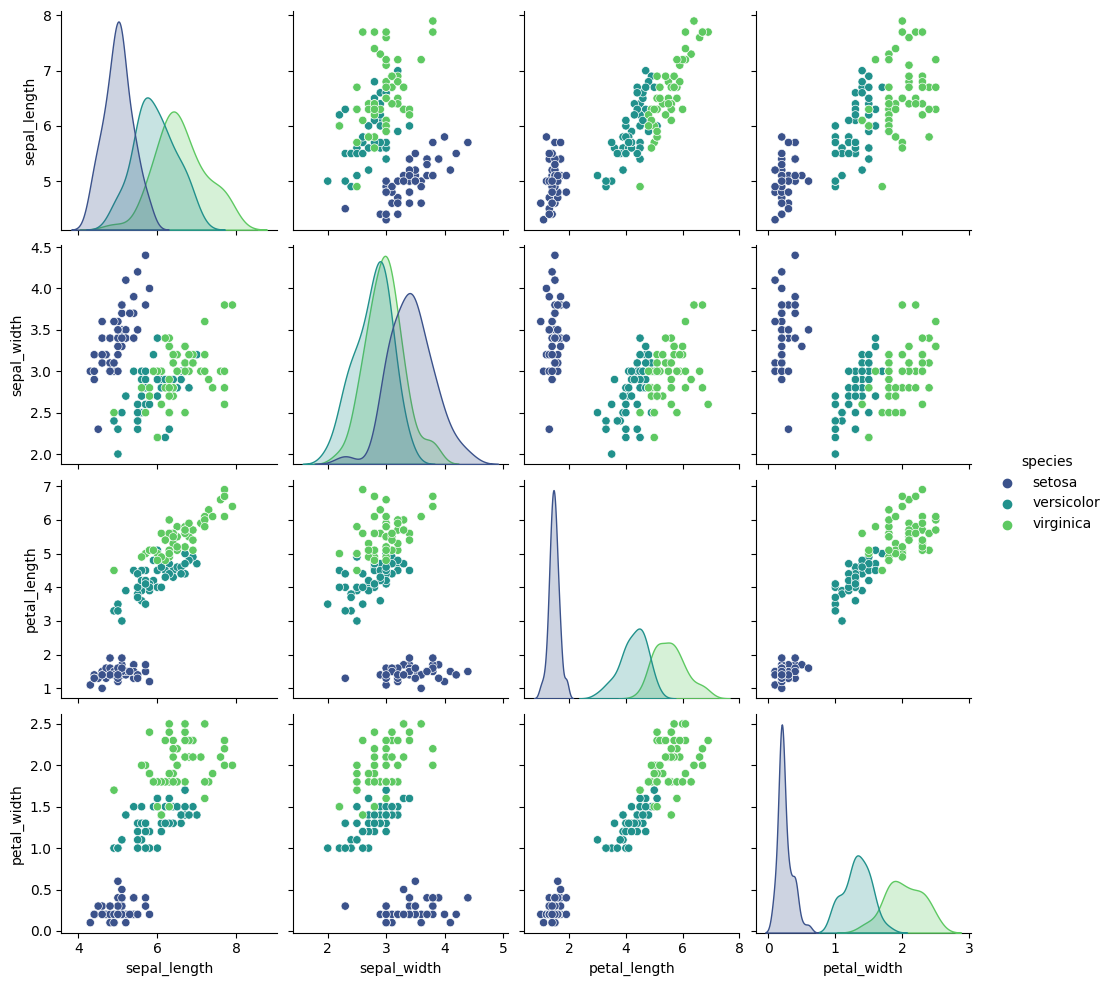

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test), verbose=1)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1) 

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


iris_df = sns.load_dataset('iris')
sns.pairplot(iris_df, hue='species', palette='viridis')
plt.show()